## Vanishing Gradients

In this example, we use the sigmoid activation function, which is prone to vanishing gradients. As the number of layers increases, the gradients become extremely small, resulting in slow or no learning. The model tries to learn to approximate the function y = X ^ num_layers, but due to vanishing gradients, it struggles to converge.

On the other hand, if you change the activation function to 'relu', which is more resistant to vanishing gradients, and increase the number of layers, you might observe the problem of exploding gradients. The gradients can become extremely large, causing the model's weights to update drastically, leading to instability in training.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_model(num_layers, activation_func):
    model = Sequential()
    
    # Input layer
    model.add(Dense(256, activation=activation_func, input_dim=1))
    
    # Hidden layers
    for _ in range(num_layers):
        model.add(Dense(256, activation=activation_func))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    return model

In [7]:
# Number of layers and activation function
num_layers = 20
activation_func = 'sigmoid' 
#activation_func = 'relu'

# Create the model
model = create_model(num_layers, activation_func)

In [8]:
# Compile the model
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Generate input data
X = np.random.rand(1000, 1) * 10 - 5  # Random values between -5 and 5
y = X*num_layers  # Output is raised to the power of the number of layers

# Train the model
history = model.fit(X, y, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
32/32 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/15
32/32 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/15
32/32 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/15
32/32 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/15
32/32 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/15
32/32 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/15
32/32 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/15
32/32 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/15
32/32 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/15
32/32 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.0000e+00

Text(0.5, 1.0, 'Loss Curves')

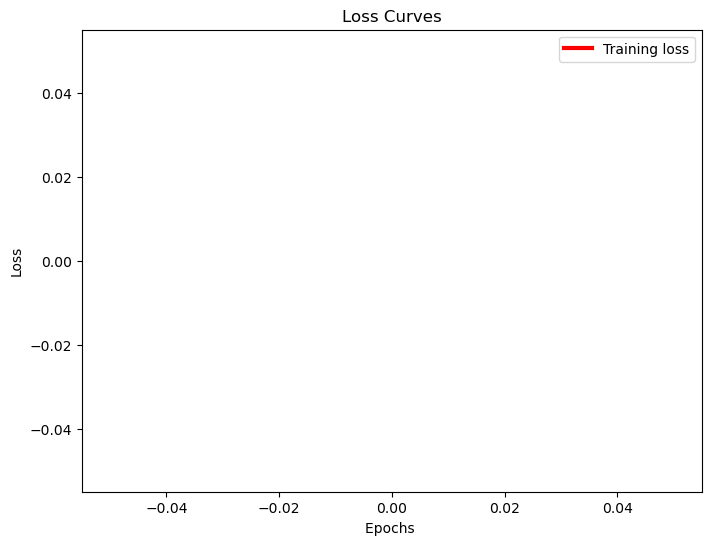

In [9]:
#Plot loss and accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.legend(['Training loss'])
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.title('Loss Curves')